In [2]:
from music21 import *
import numpy as np
from pathlib import Path
from IPython.display import Image
import csv

In [6]:
def xmlToData(xmlIn): #returns an array of note/chord instances and corresponding stickings (as lyrics)
    arrayOut = []
    for el in xmlIn.flat.notes:
        if isinstance(el, note.Note):
            arrayOut.append([el.duration.quarterLength, el.pitch.midi, str(el.lyric)])
        elif isinstance(el, chord.Chord):
            chordel = []
            for chordnote in el.notes:
                chordel.append([chordnote.pitch.midi])
            arrayOut.append([el.duration.quarterLength, chordel, str(el.lyric)])
    arrayOut = np.asarray(arrayOut, dtype=object)
    return arrayOut

def detectPermutation(arrayIn):
    perm = ''
    note1 = arrayIn[0][1]
    note2 = arrayIn[1][1]
    if note2 < note1:
        perm = 'right'
    elif note2 > note1:
        perm = 'left'
    return perm


def formatDataFull(arrayIn):
#     listOut = list()
#     for note in arrayIn:
#         pitchList = list()
#         for pitch in note[1]:
#             pitchList.append(pitch[0])
#         stickList = [int(stick) for stick in note[2].split(',')]
#         listOut.append((pitchList, stickList, note[0]))    
#     return listOut
    listOut = list()
    count = 0
    for note in arrayIn:
        pitchList = list()
        if isinstance(note[1], list):
            for pitch in note[1]:
                pitchList.append(pitch[0])
        else:
            pitchList.append(note[1])
        
        if len(note[2]) > 1:
            listOut.append((pitchList, [int(s) for s in note[2].split(',')], note[0]))
        else:
            listOut.append((pitchList[0], int(note[2]), note[0]))
        count = count+1
    return listOut
     
    
def formatDataPartial(arrayIn, stickIn):
    listOut = list()
    count = 0
    for note in arrayIn:
        pitchList = list()
        if isinstance(note[1], list):
            for pitch in note[1]:
                pitchList.append(pitch[0])
        else: #isinstance(note[1], int) comment out this bit
            pitchList=note[1]
        try:
            listOut.append((pitchList, list(stickIn[count]), note[0]))
        except TypeError:
            listOut.append((pitchList, stickIn[count], note[0]))
        count = count+1
    return listOut


        

#copy-paste from prediction models

def list_to_stream(input_list):
    output_stream = stream.Stream()
    for tup in input_list:
        if isinstance(tup[0], int):
#         if len(tup[0]) == 1:
            n = note.Note()
            p = pitch.Pitch()
            p.midi = int(tup[0])
            n.pitch = p
            n.duration = duration.Duration(float(tup[2]))
            n.addLyric(tup[1])
        elif isinstance(tup[0], list):
#         elif len(tup[0]) > 1:
            n = chord.Chord(tup[0])
            n.duration = duration.Duration(tup[2])
            n.addLyric(tup[1])
        output_stream.append(n)
    return output_stream

def render(s):
    return Image(filename=str(s.write('lily.png')))
    
    
        

In [10]:
#LOAD FILE
number = 1
letter = ''

start = number
end = 51

while number <= end:
    name = str(number)+letter
    try:
        exercise = converter.parse(Path(".\\590\\{0}.mxl".format(name)))
    except FileNotFoundError:
        tempname = name[:-1]
        tempname = tempname + 'ab'
        exercise = converter.parse(Path(".\\590\\{0}.mxl".format(tempname)))

    #CONVERT TO ARRAY
    arrayIn = xmlToData(exercise)
    #perm = detectPermutation(arrayIn)

    #ENTER STICKINGS
#     if name[-1] == 'a':
#         if perm == 'right':
#             stickIn = [2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]
#         elif perm == 'left':
#             stickIn = [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]
#     elif name[-1] == 'b':
#         if perm == 'right':
#             stickIn = [4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3]
#         elif perm == 'left':
#             stickIn = [3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4]


#     userInput = str(input("ex{0}: ".format(name))).strip()
#     firstSlice = userInput.split(' ')
#     pattern = []
#     for i in firstSlice:
#         if len(i) > 1:
#             i = i.split(',')
#             i = [int(j) for j in i]
#         else:
#             i = int(i)
#         pattern.append(i)
#     stickIn = list(np.tile(pattern, 16))
#     print('Received: {0}'.format(pattern))


    #VISUAL CHECK
    output = formatDataFull(arrayIn)
#     print(output)

    # #Visualisation
    # xstream = list_to_stream(output)
    # #to_render = stickings_as_lyrics(xstream, ynew)

    # render(xstream)

    #All clear? Then add to dictionary
    e = {}
    e["ex590-{0}".format(name)] = output

    with open("590-exercise_dictionary_{0}-{1}.csv".format(start, end), "a", newline='') as savefile:
        w = csv.writer(savefile)
        for key, val in e.items():
            w.writerow([key, val])
        savefile.close()
    print("Exercise {0} written to file.".format(name))
    
    
    #Iterate through letter
#     letter = chr(ord(letter)+1)
    
#     if letter == 'l':
#         number+=1
#     else:
    number+=1
    
    if number > 55:
        break


Exercise 1 written to file.
Exercise 2 written to file.
Exercise 3 written to file.
Exercise 4 written to file.
Exercise 5 written to file.
Exercise 6 written to file.
Exercise 7 written to file.
Exercise 8 written to file.
Exercise 9 written to file.
Exercise 10 written to file.
Exercise 11 written to file.
Exercise 12 written to file.
Exercise 13 written to file.
Exercise 14 written to file.
Exercise 15 written to file.
Exercise 16 written to file.
Exercise 17 written to file.
Exercise 18 written to file.
Exercise 19 written to file.
Exercise 20 written to file.
Exercise 21 written to file.
Exercise 22 written to file.
Exercise 23 written to file.
Exercise 24 written to file.
Exercise 25 written to file.
Exercise 26 written to file.
Exercise 27 written to file.
Exercise 28 written to file.
Exercise 29 written to file.
Exercise 30 written to file.
Exercise 31 written to file.
Exercise 32 written to file.
Exercise 33 written to file.
Exercise 34 written to file.
Exercise 35 written to 

[([52, 60], [1, 2], Fraction(1, 6)), (84, 4, Fraction(1, 6)), (72, 3, Fraction(1, 6)), ([53, 62], [1, 2], Fraction(1, 6)), (84, 4, Fraction(1, 6)), (72, 3, Fraction(1, 6)), ([55, 64], [1, 2], Fraction(1, 6)), (84, 4, Fraction(1, 6)), (72, 3, Fraction(1, 6)), ([57, 65], [1, 2], Fraction(1, 6)), (84, 4, Fraction(1, 6)), (72, 3, Fraction(1, 6)), ([55, 64], [1, 2], Fraction(1, 6)), (84, 4, Fraction(1, 6)), (72, 3, Fraction(1, 6)), ([53, 62], [1, 2], Fraction(1, 6)), (84, 4, Fraction(1, 6)), (72, 3, Fraction(1, 6)), ([52, 60], [1, 2], Fraction(1, 6)), (84, 4, Fraction(1, 6)), (72, 3, Fraction(1, 6)), (72, [1, 2], Fraction(1, 6)), (84, 4, Fraction(1, 6)), (72, 3, Fraction(1, 6))]


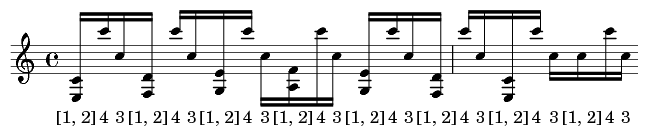

In [7]:
name = '518'
# R = [1,2]
# L = [3,4]
try:
    exercise = converter.parse(Path(".\\LHS-202-and-on\\{0}.mxl".format(name)))
except FileNotFoundError:
    tempname = name[:-1]
    tempname = tempname + 'ab'
    exercise = converter.parse(Path(".\\LHS-202-and-on\\{0}.mxl".format(tempname)))

#CONVERT TO ARRAY
arrayIn = xmlToData(exercise)
#print(detectPermutation(arrayIn))
#print(arrayIn)

#ENTER STICKINGS
#stickIn = [3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4]
stickIn = list(np.tile([[1,2],4,3], 20))

#VISUAL CHECK
output = formatDataPartial(arrayIn, stickIn)
print(output)

#Visualisation
xstream = list_to_stream(output)
#to_render = stickings_as_lyrics(xstream, ynew)

render(xstream)



In [85]:
#All clear? Then add to dictionary

e = {}
e["ex{0}".format(name)] = output

with open("exercise_dictionary_ff-test.csv", "a", newline='') as savefile:
    w = csv.writer(savefile)
    for key, val in e.items():
        w.writerow([key, val])
    savefile.close()
print("Exercise {0} written to file.".format(name))

Exercise 327ff written to file.


In [11]:
#Merge dictionaries

import os
csv_out = 'exercise_dictionary_431and590.csv'

files = [f for f in os.listdir('.') if os.path.isfile(f)]

csv_list = []
for file in files:
    if file.endswith('.csv'):
        csv_list.append(file)
        
print(csv_list)
        
csv_merge = open(csv_out, 'w', newline='')

for file in csv_list:
    csv_in = open(file)
    for line in csv_in:
        csv_merge.write(line)
    csv_in.close()
csv_merge.close()
print('Verify consolidated CSV file: ' + csv_out)

    

['431-exercise_dictionary_1-28.csv', '590-exercise_dictionary_1-51.csv']
Verify consolidated CSV file: exercise_dictionary_431and590.csv
